In [1]:
import numpy as np
import pandas as pd
import json
import nltk

import matplotlib.pyplot as plt
import requests
import urllib.request

%matplotlib inline

In [5]:
# data downloaded from here: http://jmcauley.ucsd.edu/data/amazon/
df = pd.read_json('https://graderdata.s3.amazonaws.com/reviews_Pet_Supplies_5.json', lines=True)
#lines = True is for parsing more than one block of data from your json

In [6]:
df.shape

(157836, 9)

In [14]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A14CK12J7C7JRK,1223000893,Consumer in NorCal,"[0, 0]",I purchased the Trilogy with hoping my two cat...,3,Nice Distraction for my cats for about 15 minutes,1294790400,"01 12, 2011"
1,A39QHP5WLON5HV,1223000893,Melodee Placial,"[0, 0]",There are usually one or more of my cats watch...,5,Entertaining for my cats,1379116800,"09 14, 2013"
2,A2CR37UY3VR7BN,1223000893,Michelle Ashbery,"[0, 0]",I bought the triliogy and have tested out all ...,4,Entertaining,1355875200,"12 19, 2012"
3,A2A4COGL9VW2HY,1223000893,Michelle P,"[2, 2]",My female kitty could care less about these vi...,4,Happy to have them,1305158400,"05 12, 2011"
4,A2UBQA85NIGLHA,1223000893,"Tim Isenhour ""Timbo""","[6, 7]","If I had gotten just volume two, I would have ...",3,You really only need vol 2,1330905600,"03 5, 2012"


In [11]:
df.sample(10)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
54178,A3IF2RRR8R84BV,B000OBH4W2,"K. Davis ""Kathy Diamond Davis, author""","[5, 9]",I bought three balls that I think were under t...,3,CAUTION!,1290729600,"11 26, 2010"
65817,A3KC82RZ6AUJ1U,B0013L2DSC,Louise Garcia,"[0, 0]","Do yourself, and your guinea pig a favor, and ...",5,Best product! Important reason why!,1372809600,"07 3, 2013"
155846,A34DQINHT6NYJU,B00HPZEMR0,"Kathi Miller ""Kisserman""","[1, 1]","As a Vine reviewer, I have 30 days to review p...",4,Cats Love the Taste,1401580800,"06 1, 2014"
12264,A9CQ67UGW74MP,B0002ARU2E,JJbean,"[0, 0]","Our German Shepard like this, but I was very d...",3,Not for bigger dogs,1358553600,"01 19, 2013"
123531,A2171Y55UAK3BP,B004VBC0SY,J. Gordon,"[0, 0]",We keep loosing it because it is black so cant...,3,Ok for a ball,1394409600,"03 10, 2014"
119475,A39UI5YBDSTDTH,B004ITWDLS,Hugo Reyes,"[0, 0]",Small amount for the price. Dog loved it but w...,2,watch the serving size,1384041600,"11 10, 2013"
3527,A2BFB4N8KGE75M,B000241NRI,DaniT,"[0, 0]",The unit holds a substantial amount of dry foo...,5,Perfect for weekend travel and nighttime feedings,1400284800,"05 17, 2014"
116705,A7BT26NLREQN1,B004AP9Y58,atlasathome,"[0, 0]",I use these for my expressive cat. I also use...,5,Fine product,1367366400,"05 1, 2013"
17315,A2CNL2R1PJDZRX,B0002DI68I,Jill,"[0, 0]",There really was everything needed to ship an ...,5,Got what i paid for,1355788800,"12 18, 2012"
113457,A16OK37752MNVW,B0041GD998,Enlighten Me,"[10, 10]",There are a few reasons why I will now only us...,5,For maximum huggability,1316995200,"09 26, 2011"


- When it comes to review data, generally there wil be skewness and other potential issues, let's evaluate to see if it's true here

<AxesSubplot:>

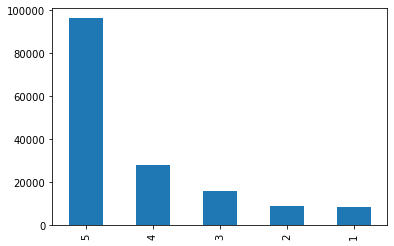

In [17]:
df.overall.value_counts().plot(kind='bar')

- Let's evaluate what might be the most frequent words observed in 5's as it's by far our most popular rating. We'll combine a few steps at once here.

- First we'll create a mask for our data frame. Then we'll lower case all the string text found within our review as well as join all our text into a single long string to form what's known as a "corpus".

In [18]:
best_rev_corpus = ' '.join(df[df['overall']==5]['reviewText']).lower()

- Now let's introduce some tools that will assist us with counting our most frequent words (tokens).

In [19]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string

In [24]:
lemmatizer= WordNetLemmatizer()

In [25]:
stop_filters = stopwords.words('english') + list(string.punctuation)

In [44]:
best_rev_tokens = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(best_rev_corpus) if tokens not in stop_filters]

fdist = FreqDist(best_rev_tokens)
fdist.most_common(50)

[('one', 44021),
 ('love', 42623),
 ('like', 34561),
 ('get', 29754),
 ('food', 29604),
 ('dog', 27128),
 ('great', 27020),
 ('cat', 25234),
 ('toy', 24606),
 ('would', 23372),
 ('product', 23338),
 ('use', 21286),
 ('time', 21204),
 ('well', 20254),
 ('good', 19377),
 ('treat', 18047),
 ('work', 17410),
 ('little', 17309),
 ('much', 16659),
 ('really', 16604),
 ('also', 15814),
 ('keep', 14510),
 ('two', 14223),
 ('day', 14199),
 ('make', 13474),
 ('water', 13182),
 ('easy', 13155),
 ('even', 13015),
 ('litter', 12929),
 ('year', 12842),
 ("'ve", 12568),
 ('go', 12409),
 ('put', 11902),
 ('small', 11709),
 ('bought', 11615),
 ('around', 11346),
 ('34', 11337),
 ('box', 11180),
 ('used', 11007),
 ('size', 10999),
 ('still', 10991),
 ('bag', 10866),
 ('recommend', 10680),
 ('got', 10394),
 ('thing', 10291),
 ('month', 10161),
 ('price', 10039),
 ('old', 9779),
 ('buy', 9693),
 ('give', 9515)]

**Next steps:**

- So we see here that there's still some tokens that are not very helpful. While you may be interested in how often dog and cat appears, it's unlikely that we can attribute those tokens to the five star reviews. Since this will be an iterative process, it makes sense for us to create a function that will filter for us.

In [37]:
## note this uses word_tokenize from nltk

def extra_filter(corpus, stop_tokens):
    '''
    corpus: string format of text data
    stop_tokens: list of tokens you wish to add to stopwords filter
    '''
    from nltk.tokenize import word_tokenize
    
    stop_filters = stopwords.words('english') + list(string.punctuation) + stop_tokens
    filtered_tokens = [lemmatizer.lemmatize(tokens) for tokens in word_tokenize(corpus) 
                       if lemmatizer.lemmatize(tokens) not in stop_filters]
    return filtered_tokens

In [41]:
extra_stopwords = ["n't", "'s", 'dog', 'cat', '...' ,"''", "'m", '``', '--', 'pet', "'ve"]

best_rev_new_toks = extra_filter(corpus= best_rev_corpus, stop_tokens=extra_stopwords)

In [42]:
fdist = FreqDist(best_rev_new_toks)
fdist.most_common(50)

[('one', 44021),
 ('wa', 42967),
 ('love', 42623),
 ('like', 34561),
 ('ha', 30683),
 ('get', 29754),
 ('food', 29604),
 ('great', 27020),
 ('toy', 24606),
 ('would', 23372),
 ('product', 23338),
 ('use', 21286),
 ('time', 21204),
 ('well', 20254),
 ('good', 19377),
 ('doe', 18833),
 ('treat', 18047),
 ('work', 17410),
 ('little', 17309),
 ('much', 16659),
 ('really', 16604),
 ('also', 15814),
 ('keep', 14510),
 ('two', 14223),
 ('day', 14199),
 ('make', 13474),
 ('water', 13182),
 ('easy', 13155),
 ('even', 13015),
 ('litter', 12929),
 ('year', 12842),
 ('go', 12409),
 ('put', 11902),
 ('small', 11709),
 ('bought', 11615),
 ('around', 11346),
 ('34', 11337),
 ('box', 11180),
 ('used', 11007),
 ('size', 10999),
 ('still', 10991),
 ('bag', 10866),
 ('recommend', 10680),
 ('got', 10394),
 ('thing', 10291),
 ('month', 10161),
 ('price', 10039),
 ('old', 9779),
 ('buy', 9693),
 ('give', 9515)]

- We can also use the Frequency Distribution object to look at frequencies of specific words. For example, I may be interested in if a particular word such as "safe" is often used. This is because we can see that the FreqDist stores the words as keys and the occurances as values in a dictionary like format.

In [19]:
fdist.keys()

dict_keys(['usually', 'one', 'cat', 'watching', 'tv', 'staying', 'trouble', 'dvd', 'playing', 'seem', 'like', 'mouse', 'bird', 'maybe', 'go', 'little', 'le', 'stir', 'crazy', 'inside', 'time', 'rottie', 'food', 'allergy', 'poultry', 'beef', 'dairy', "'ve", 'difficult', 'finding', 'toothpaste', 'make', 'allergic', 'enjoys', 'taste', 'peanut', 'flavor', 'smell', 'black', 'licorice', 'love', 'wiggle', 'much', 'brush', 'teeth', 'every', 'night', 'price', 'ok', 'wish', 'tube', 'came', 'larger', 'size', 'soooo', 'pup', 'his/her', 'current', 'might', 'want', 'try', 'puppy', 'stuff', 'tail', 'start', 'wagging', 'soon', 'ask', 'ready', 'actually', 'enjoyable', 'daily', 'experience', 'definitely', '34', 'work', 'great', 'hate', 'gum', 'health', 'important', 'pearly', 'white', 'yes', 'princess', 'enjoying', 'showing', 'getting', 'best/top', 'result', '..', 'strongly', 'recommended', 'without', 'regret', 'product', 'well', 'used', 'consistently', 'four', 'dog', 'habit', 'happy', 'holder', 'heath',

In [20]:
fdist['safe']

1998

- The results from our frequency distribution are better but we may still be missing some of the context of what people are talking about. The issue is, we're currently examining strictly tokens in isolation, but what if we can capture some of the context behind each token?

- One method to do so is by extracting bigrams instead of individual words (unigrams).

In [45]:
best_rev_bigram = list(nltk.bigrams(best_rev_tokens))

In [46]:
fdist_bi = FreqDist(best_rev_bigram)
fdist_bi.most_common(50)

[(('highly', 'recommend'), 4068),
 (('litter', 'box'), 3932),
 (('dog', 'love'), 3363),
 (('year', 'old'), 3344),
 (('cat', 'love'), 3240),
 (('work', 'great'), 2982),
 (('work', 'well'), 2698),
 (('great', 'product'), 2289),
 (('would', 'recommend'), 2254),
 (('dry', 'food'), 2235),
 (('long', 'time'), 1977),
 (('well', 'made'), 1949),
 (('really', 'like'), 1876),
 (('make', 'sure'), 1754),
 (('love', 'toy'), 1737),
 (('month', 'old'), 1691),
 (('much', 'better'), 1647),
 (('every', 'day'), 1626),
 (('last', 'long'), 1503),
 (('easy', 'clean'), 1482),
 (('even', 'though'), 1463),
 (('look', 'like'), 1373),
 (('easy', 'use'), 1332),
 (('absolutely', 'love'), 1281),
 (('recommend', 'product'), 1259),
 (('great', 'price'), 1209),
 (('two', 'cat'), 1189),
 (("'ve", 'tried'), 1184),
 (('another', 'one'), 1176),
 (('first', 'time'), 1092),
 (('year', 'ago'), 1087),
 (('love', 'treat'), 1065),
 (('every', 'time'), 1048),
 (('love', 'love'), 1045),
 (('good', 'quality'), 1045),
 (('high', 'qu

- So already just from examining this list, we can see some potential comments rise towards the top namely that products where the animal seem to enjoy them influences a good nature of the five star reviews. In addition, other traits such as easy to use for the owner also factor in.
- Much like prior, we can examine if a given bi-gram exists within our dataset. A popular pet food brand is "Science Diet" and you may be interested in seeing whether this particular brand was mentioned in our dataset.

In [24]:
fdist_bi[('science', 'diet')]

403

- It seems there are comments that mention this particular brand. Let's see if we can examine what're terms commonly used in the specific reviews that reference it. We will combined what we learned prior to create two filters that pairs down to reviews that are five stars and mentions the relevant brand in their review text.

In [47]:
sciencediet_df = df[df['reviewText'].str.contains('Science Diet', na=False)]
sciencediet_df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
833,A2V9DTXTQ5YIMK,B000084DWM,"A. Hudson ""bisou bisou""","[1, 1]",I used to only buy Science Diet. Knowing my el...,2,Nine different cats and none of them like it,1390262400,"01 21, 2014"
837,A3AGTCQ1OYJGIP,B000084DWM,"BK BAZHE ""writer, poet, & artist.""","[0, 0]","Science Diet, I use for many years. My Cat is ...",5,Great food for cats.,1405036800,"07 11, 2014"
839,A3R17B6UX466U5,B000084DWM,Bruce S.,"[3, 3]",This cat food contains a lower level of magnes...,5,Low magnesium levels are worth the extra cost.,1391558400,"02 5, 2014"
841,A334SPS816A2GG,B000084DWM,D. Butler,"[0, 0]","My two cats age 5 and 18, yes, 18 love this fo...",5,Favorite flavor of both of my Siamese cats age...,1385078400,"11 22, 2013"
842,A2PBXA17MGI716,B000084DWM,"D. Grubb ""ddnwvfan""","[0, 0]",Both my cats love Hills Science Diet food! It...,5,Love,1399766400,"05 11, 2014"
...,...,...,...,...,...,...,...,...,...
156731,A342PAZ5NSQRM3,B00IDZTGIG,Amazon Customer,"[0, 0]",I like the natural ingredients which are healt...,4,Healthy food for your adult cat,1398902400,"05 1, 2014"
156736,A2D7B5I7ZQ51XL,B00IDZTGIG,Anthony Pittore,"[0, 0]",There are two requirements for pet food: High-...,3,"High-quality, but my cats don't like it",1400112000,"05 15, 2014"
156784,ATLA5CJH0ZZHP,B00IDZTGIG,Terry R. Nye,"[0, 0]",We have five cats and all enjoy snacking on dr...,4,high-quality dry food; extremely expensive,1398729600,"04 29, 2014"
156856,A3TP31S61PPE3G,B00IDZTGMM,AlexJouJou,"[1, 1]",Frankly my Genny is very picky with her food. ...,5,This IS the Cat's Meow!,1397433600,"04 14, 2014"


In [48]:
best_sd_reviews = ' '.join(sciencediet_df[sciencediet_df['overall']==5]['reviewText']).lower()
best_science_tokens = extra_filter(corpus= best_sd_reviews, stop_tokens=extra_stopwords)

fdist_sci_diet = FreqDist(best_science_tokens)

- By looking at the tokens, we can't really find too much of useful information from the result. Maybe it is a good time to check the bi-gram.

In [49]:
fdist_sci_diet.most_common(50)

[('food', 1189),
 ('diet', 424),
 ('science', 347),
 ('wa', 347),
 ('like', 244),
 ('one', 226),
 ('ha', 214),
 ('dry', 190),
 ('love', 146),
 ('good', 138),
 ('grain', 136),
 ('get', 135),
 ('eat', 135),
 ('bag', 126),
 ('year', 121),
 ('would', 121),
 ('vet', 120),
 ('much', 120),
 ('product', 113),
 ('feed', 109),
 ('also', 107),
 ('brand', 106),
 ('hill', 106),
 ('ingredient', 106),
 ('time', 104),
 ('canned', 99),
 ('old', 98),
 ('day', 98),
 ('two', 93),
 ('free', 93),
 ('doe', 91),
 ('even', 88),
 ('tried', 85),
 ('chicken', 84),
 ('first', 84),
 ('kibble', 80),
 ('34', 79),
 ('little', 79),
 ('give', 79),
 ('eating', 79),
 ('well', 77),
 ('problem', 77),
 ('since', 76),
 ('le', 76),
 ('new', 76),
 ('price', 74),
 ('really', 73),
 ('make', 71),
 ('month', 68),
 ('blue', 67)]

- "science" and "diet" are the most common bigram for sure but there are some other interesting bigrams showed up

In [51]:
best_science_bigram = list(nltk.bigrams(best_science_tokens))
fdist_bsb = FreqDist(best_science_bigram)
fdist_bsb.most_common(50)

[(('science', 'diet'), 338),
 (('dry', 'food'), 151),
 (('canned', 'food'), 83),
 (('hill', 'science'), 74),
 (('grain', 'free'), 66),
 (('year', 'old'), 52),
 (('blue', 'buffalo'), 52),
 (('wet', 'food'), 34),
 (('food', 'wa'), 30),
 (('diet', 'food'), 29),
 (('food', 'ha'), 27),
 (('love', 'food'), 24),
 (('diet', 'adult'), 24),
 (('free', 'food'), 23),
 (('quality', 'food'), 23),
 (('ideal', 'balance'), 22),
 (('new', 'food'), 21),
 (('purina', 'one'), 21),
 (('food', 'doe'), 20),
 (('royal', 'canin'), 19),
 (('sensitive', 'stomach'), 19),
 (('food', 'would'), 18),
 (('food', 'also'), 17),
 (('food', 'love'), 16),
 (('high', 'quality'), 16),
 (('diet', 'dry'), 15),
 (('like', 'food'), 15),
 (('free', 'shipping'), 15),
 (('subscribe', 'save'), 15),
 (('natural', 'balance'), 15),
 (('kitten', 'food'), 15),
 (('pound', 'bag'), 14),
 (('would', 'eat'), 14),
 (('ca', 'say'), 14),
 (('brand', 'food'), 13),
 (('food', 'like'), 13),
 (('food', 'store'), 13),
 (('buffalo', 'wilderness'), 13)

- This object also has a built in plotting method where we can look at the frequency distribution visually.

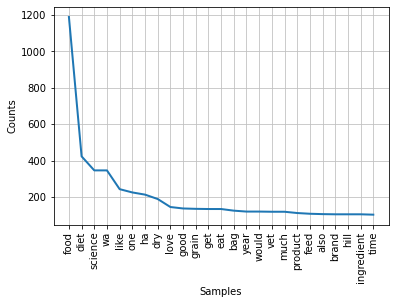

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [61]:
fdist_sci_diet.plot(25)

- Alternatively we can look at it as a bar graph. Here we remove "food" because it was by far the most common token and making our visualization less useful due to it's count.

<AxesSubplot:xlabel='Tokens'>

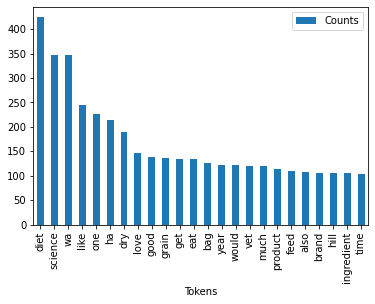

In [62]:
pd.DataFrame(fdist_sci_diet.most_common(25)[1:], columns=['Tokens', 'Counts']).set_index('Tokens').plot(kind='bar')

- We can do additional iterations to filter out excess "obvious" factors but we will leave that direction for additional future work.
- Now let's tie this together with other topics we've learned from Data Analysis. For example, suppose, we're interested in the top 5 terms and their frequencies of each of the review ratings.

In [63]:
#First we create the groups into groupby objects
rev_groups = df.groupby('overall')

In [52]:
#next let's build a function that we can apply aggregated to our groups

def freq_analysis(txt, stop_tokens=extra_stopwords, num =50):
    txt = ' '.join(txt).lower()
    stop_filters = stopwords.words('english') + list(string.punctuation) + stop_tokens
    filtered_tokens = [tokens for tokens in word_tokenize(txt) 
                       if tokens not in stop_filters]
    
#     return filtered_tokens
    fdist = FreqDist(filtered_tokens)
    return fdist.most_common(num)


In [55]:
rev_top50 = rev_groups.agg({'reviewText' : freq_analysis})

In [56]:
pd.set_option('display.max_colwidth', None)

rev_top50

,reviewText
overall,
1,"[(would, 4138), (one, 3920), (product, 3098), (like, 2788), (get, 2447), (dogs, 2296), (cats, 2258), (even, 2083), (food, 2004), (toy, 1706), (time, 1672), (use, 1625), (work, 1607), (litter, 1578), (could, 1540), (back, 1495), (made, 1464), (good, 1444), (bought, 1441), (money, 1324), (first, 1313), (got, 1304), (much, 1287), (box, 1266), (two, 1263), (buy, 1253), (well, 1232), (really, 1222), (also, 1215), (water, 1204), (small, 1132), (used, 1125), (put, 1101), (34, 1068), (tried, 1053), (still, 1045), (never, 1025), (thing, 1006), (2, 994), (way, 983), (little, 978), (away, 969), (waste, 943), (better, 937), (day, 903), (know, 888), (great, 879), (thought, 879), (go, 847), (make, 843)]"
2,"[(would, 4537), (one, 4200), (like, 3576), (cats, 2684), (get, 2669), (food, 2425), (dogs, 2377), (product, 2262), (use, 1895), (even, 1858), (toy, 1813), (really, 1776), (good, 1764), (much, 1719), (time, 1632), (well, 1578), (work, 1561), (litter, 1555), (two, 1538), (small, 1493), (also, 1428), (could, 1418), (little, 1359), (back, 1355), (water, 1344), (first, 1307), (still, 1282), (better, 1264), (got, 1254), (bought, 1251), (made, 1179), (34, 1177), (around, 1148), (box, 1124), (great, 1122), (think, 1111), (eat, 1093), (2, 1090), (put, 1077), (used, 1050), (tried, 1013), (way, 1008), (treats, 959), (try, 958), (buy, 944), (thought, 911), (since, 904), (thing, 897), (see, 890), (something, 889)]"
3,"[(would, 7547), (like, 7130), (one, 7071), (dogs, 4888), (food, 4844), (get, 4832), (cats, 4559), (product, 3760), (good, 3759), (use, 3734), (really, 3628), (much, 3555), (toy, 3463), (well, 3277), (time, 2941), (little, 2891), (small, 2757), (still, 2527), (two, 2495), (also, 2488), (think, 2449), (even, 2350), (better, 2347), (litter, 2312), (could, 2301), (great, 2279), (work, 2237), (34, 2202), (water, 2195), (eat, 2095), (first, 2081), (treats, 2063), (got, 2056), (bought, 1975), (back, 1958), (however, 1922), (put, 1915), (around, 1908), (used, 1892), (size, 1828), (sure, 1822), (box, 1818), (made, 1803), (love, 1720), (though, 1702), (since, 1691), (keep, 1688), (way, 1660), (make, 1644), (long, 1642)]"
4,"[(one, 13532), (like, 12947), (would, 11274), (food, 9175), (dogs, 8716), (get, 8647), (good, 7951), (cats, 7835), (use, 7521), (well, 7136), (little, 6956), (really, 6326), (product, 6317), (great, 6102), (much, 5884), (time, 5771), (toy, 4947), (also, 4947), (small, 4880), (water, 4833), (still, 4827), (two, 4684), (litter, 4332), (love, 4329), (think, 3877), (around, 3836), (even, 3808), (put, 3781), (treats, 3776), (size, 3775), (used, 3756), (bit, 3701), (first, 3663), (34, 3660), (easy, 3635), (keep, 3624), (could, 3541), (seems, 3531), (better, 3527), (got, 3446), (works, 3388), (loves, 3329), (bought, 3305), (box, 3302), (long, 3286), (work, 3252), (since, 3236), (back, 3212), (price, 3191), (make, 3169)]"
5,"[(one, 40728), (like, 30087), (food, 27194), (dogs, 27128), (great, 27015), (love, 25470), (cats, 25234), (get, 24041), (would, 23372), (use, 21286), (well, 20252), (product, 19628), (good, 19359), (little, 17308), (time, 17244), (loves, 17150), (much, 16659), (really, 16604), (toy, 15885), (also, 15814), (two, 14220), (water, 13168), (easy, 13155), (even, 13008), (litter, 12529), (small, 11698), (bought, 11615), (put, 11611), (treats, 11515), (around, 11346), (34, 11337), (used, 11007), (still, 10987), (recommend, 10680), (keep, 10552), (got, 10394), (size, 10136), (works, 10111), (old, 9754), (buy, 9646), (price, 9568), (first, 9513), (box, 9413), (go, 9371), (day, 9345), (made, 9305), (long, 9283), (back, 8863), (since, 8746), (2, 8721)]"


- While we still need to dig deeper, we can see that there does seem to be some trend where dog products seem to review worse than cats from even the review tokens themselves. A fair amount of negative reviews seems related to dog food or the after effects said food products. 

- As a pet owner, you might be interested in certain aspects of a product, namely safety as a feature.

- By looking for the word "safe" we may be interested in what words appear in context with that term within our reviews.

- For processessing time of certain tasks later, we'll just use the five star reviews for now to demonstrate.

In [58]:
# Create a nltk Text object

best_rated_text = nltk.Text(best_rev_corpus.split())

In [59]:
best_rated_text.concordance('safe')

Displaying 25 of 1511 matches:
d toy was destroyed. figured it'd be safe because my own dog is really particu
his is the only drop product that is safe for cats too! (always check the labe
frontline, it says that they are not safe for sick animals, young kittens, etc
onthly flea control to keep your cat safe and healthy! i have used it for almo
omething. most nylabone products are safe (we have had some bad experiences wi
sy for large blocks of time and it's safe for him to digest. i have 3 differen
 tail almost down to nothing! so far safe and nothing has come off or loose. m
tty, you might try these. i wanted a safe bubble product for my year old cats.
nds - there are a mere 14 considered safe and healthy. since the founding of n
ble, bits of hotdog, or whatever dog safe food i have lying around10 month old
 day so know that these biscuits are safe and truly grain free and wont cause 
ducts safely in order for them to be safe for their home and pets. i would hig
d this product to any

- We can examine contexts of two terms if needed. For example, I am curious which terms are commonly used with "safe" and "cat".

In [60]:
best_rated_text.common_contexts(['safe', 'cat'])

a_and her_and and_and and_to a_toy her_from the_and both_and a_product
and_in a_treat and_is in_and a_item stay_in pet_and her_in and_are
a_treat. time._and


- From here we're able to find some common themes regarding products that seem to review high regarding this "topic" of interest. The reviews that discuss these products are often centered around food allergies. So those may be something to examine when reading reviews of interest for a product.

- So now at this stage, we've only scratched the surface of what we can examine with our standard data analytics tools from text. Try to see how you can answer the following questions?
    - Which products appear to be the most safe according to your analysis? (hint are there proxies of information you can use for this?)
    - Can you find durability ratings for certain toys?
    - Are there products that pets especially seem to like? Dislike?